In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [3]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ] 

In [74]:
vocab_size = 2_000
embedding_dim = 100
max_length = 1403

In [5]:
train_df = pd.read_csv("../input/train.csv")
print(train_df.shape)
train_df[:3]

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [107]:
test_df = pd.read_csv("../input/test.csv")
print(test_df.shape)
test_df[:3]

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."


In [6]:
target_cols = np.array(['toxic','severe_toxic',
                        'obscene', 'threat',
                        'insult', 'identity_hate'])

In [7]:
def concat_labels(row):
    label_idx = np.where(row)[0]
    # print(label_idx, len(label_idx), row.index)
    
    if len(label_idx)>0:
        return " ".join(row.index[label_idx].tolist())
    else:
        return "none"

def onehot_labels(row):
        return row.astype("int").values.reshape(1, -1)
    
# (train_df[target_cols]>0)[:12].apply(concat_labels,1)
(train_df[target_cols]>0)[:12].apply(onehot_labels,1)

0     [[0, 0, 0, 0, 0, 0]]
1     [[0, 0, 0, 0, 0, 0]]
2     [[0, 0, 0, 0, 0, 0]]
3     [[0, 0, 0, 0, 0, 0]]
4     [[0, 0, 0, 0, 0, 0]]
5     [[0, 0, 0, 0, 0, 0]]
6     [[1, 1, 1, 0, 1, 0]]
7     [[0, 0, 0, 0, 0, 0]]
8     [[0, 0, 0, 0, 0, 0]]
9     [[0, 0, 0, 0, 0, 0]]
10    [[0, 0, 0, 0, 0, 0]]
11    [[0, 0, 0, 0, 0, 0]]
dtype: object

In [8]:
idx_x, idx_y = np.where(train_df[target_cols]>0)
len(idx_x)

35098

In [9]:
sentences = train_df["comment_text"].tolist()

In [108]:
test_sentences = test_df["comment_text"].tolist()

In [10]:
# labels = (train_df[target_cols]>0).apply(concat_labels,1)
labels = (train_df[target_cols]>0).apply(onehot_labels,1)
labels_npy = np.concatenate(labels.values, axis=0)

# Tokenize

### Sentence

In [11]:
tokenizer = Tokenizer(oov_token = "<OOV>", num_words=vocab_size)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

210338


In [77]:
pd.Series(word_index)

<OOV>               1
the                 2
to                  3
of                  4
and                 5
                ...  
1053           210334
hanumakonda    210335
956ce          210336
automakers     210337
ciu            210338
Length: 210338, dtype: int64

In [78]:
sequences = tokenizer.texts_to_sequences(sentences) # Your Code Here
padded = pad_sequences(sequences, padding = 'post')  # Your Code here
print(padded[0])
print(padded.shape)

[689  76   2 ...   0   0   0]
(159571, 1403)


In [111]:
test_sequences = tokenizer.texts_to_sequences(test_sentences) # Your Code Here
test_padded = pad_sequences(test_sequences, padding = 'post', maxlen=1403)  # Your Code here
print(test_padded[0])
print(test_padded.shape)

[  1 656   1 ...   0   0   0]
(153164, 1403)


In [112]:
print(len(padded[0]))
print(len(test_padded[0]))

1403
1403


### Label

In [80]:
# v1 labels
# label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(labels)
# label_word_index = label_tokenizer.word_index
# label_seq = label_tokenizer.texts_to_sequences(labels)
# print(label_seq[:5])
# print(label_word_index)

# Model

In [142]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length), 
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(24, activation = 'relu'), 
    tf.keras.layers.Dense(6, activation = 'sigmoid')
    
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['mae', tf.keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1403, 100)         200000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                2424      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 202,574
Trainable params: 202,574
Non-trainable params: 0
_________________________________________________________________


In [143]:
np.random.seed(1291)
X_train, X_test, y_train, y_test = train_test_split(padded, labels_npy, test_size=0.2)

In [144]:
history = model.fit(X_train, y_train, epochs=15, batch_size=100, validation_split=0.2)

Epoch 1/15
1022/1022 [==============================] - 49s 48ms/step - loss: 0.1720 - mae: 0.0967 - auc: 0.7200 - val_loss: 0.1383 - val_mae: 0.0664 - val_auc: 0.8020
Epoch 2/15
1022/1022 [==============================] - 49s 48ms/step - loss: 0.1323 - mae: 0.0661 - auc: 0.8162 - val_loss: 0.1281 - val_mae: 0.0573 - val_auc: 0.8646
Epoch 3/15
1022/1022 [==============================] - 49s 48ms/step - loss: 0.1174 - mae: 0.0617 - auc: 0.8816 - val_loss: 0.1109 - val_mae: 0.0567 - val_auc: 0.9054
Epoch 4/15
1022/1022 [==============================] - 49s 48ms/step - loss: 0.1042 - mae: 0.0558 - auc: 0.9144 - val_loss: 0.1013 - val_mae: 0.0581 - val_auc: 0.9251
Epoch 5/15
1022/1022 [==============================] - 49s 48ms/step - loss: 0.0945 - mae: 0.0515 - auc: 0.9311 - val_loss: 0.0927 - val_mae: 0.0515 - val_auc: 0.9387
Epoch 6/15
1022/1022 [==============================] - 49s 48ms/step - loss: 0.0868 - mae: 0.0479 - auc: 0.9427 - val_loss: 0.0866 - val_mae: 0.0448 - val_auc:

In [145]:
evel_loss, evel_mae, evel_auc = model.evaluate(x=X_test, y=y_test)

998/998 [==============================] - 4s 4ms/step - loss: 0.0710 - mae: 0.0335 - auc: 0.9636


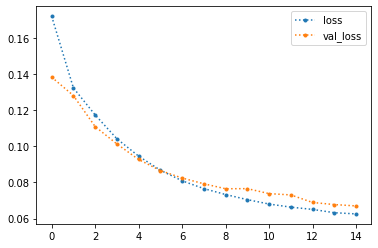

In [146]:
def plot_learning_curve(history):
        # plt.plot(history.epoch, history.history["auc"], ".:")
        # plt.plot(history.epoch, history.history["val_auc"], ".:")

        plt.plot(history.epoch, history.history["loss"], ".:", label="loss")
        plt.plot(history.epoch, history.history["val_loss"], ".:", label="val_loss")
        plt.legend()

plot_learning_curve(history)
val_auc = history.history["val_auc"][-1]

In [147]:
val_auc, evel_auc, evel_auc-abs(val_auc - evel_auc)

(0.9653877019882202, 0.9635944962501526, 0.961801290512085)

# prediction for submission

In [148]:
test_pred = model.predict(test_padded)

In [150]:
test_pred

array([[9.9649400e-01, 2.9819152e-01, 8.8668740e-01, 8.5244924e-02,
        8.3518887e-01, 1.6983256e-01],
       [5.7797134e-03, 8.9909270e-05, 1.7233789e-03, 3.9365888e-04,
        1.7042458e-03, 7.9613924e-04],
       [2.0387262e-02, 3.4394860e-04, 6.1842799e-03, 8.9854002e-04,
        6.1093569e-03, 1.9328892e-03],
       ...,
       [6.5335631e-04, 6.3608184e-07, 7.9270452e-05, 1.2955919e-05,
        5.8925096e-05, 3.7719503e-05],
       [3.8697839e-02, 9.4828632e-05, 9.5448494e-03, 3.3837557e-04,
        6.7652166e-03, 1.4368594e-03],
       [1.8995672e-01, 2.8473735e-03, 5.9914649e-02, 3.2944083e-03,
        5.3986669e-02, 9.4314516e-03]], dtype=float32)

In [149]:
# (test_pred>0.5).astype("int")

In [151]:
pd.concat([test_df["id"], pd.DataFrame(test_pred, columns=target_cols)], 1).to_csv("sub.csv", index=False)

In [152]:
!kaggle competitions submit -f sub.csv -m "" jigsaw-toxic-comment-classification-challenge

100%|██████████████████████████████████████| 13.5M/13.5M [00:06<00:00, 2.20MB/s]
Successfully submitted to Toxic Comment Classification Challenge

In [157]:
# !kaggle competitions submissions jigsaw-toxic-comment-classification-challenge

```
publicScore  privateScore
0.93708      0.93811
```